In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm, trange
import seaborn as sns

import src.metrics as metrics
import src.kernels as kernels
import src.bootstrap as boot

# KSD standard kernel

In [ ]:
np.random.seed(2024)

In [ ]:
# simulate sampling distribution for stat
stats_ls_all_eps = []
eps_ls = [0.001, 0.005, 0.01, 0.05, 0.1]
nreps = 1000

for eps in eps_ls:
    stat_ls = []
    
    ###
    mean1 = np.zeros((dim,)) # data
    mean2 = np.zeros((dim,)) # model
    
    Xs = np.random.multivariate_normal(mean1, np.eye(dim), (nreps, n))
    n_outlier = max(1, int(n * eps))
    Xs[:, :n_outlier] = outlier

    score_fn = lambda x: - (x - mean2)
    ###
    
    kernel = kernels.RBF(sigma_sq=2.)
    ksd = metrics.KSD(kernel, score_fn=score_fn)
    for X in tqdm(Xs):
        stat_ls.append(ksd(X, X, vstat=True))

    stats_ls_all_eps.append(stat_ls)

# KSD tilted kernel

In [138]:
def stats_against_outliers(outliers_ls, kernel_name, nreps, eps=0.01, dim=1, n=1000):
    stats_ls_all_ol = []
    
    for outlier in outliers_ls:
        stat_ls = []
        
        ###
        mean1 = np.zeros((dim,)) # data
        mean2 = np.zeros((dim,)) # model
        
        Xs = np.random.multivariate_normal(mean1, np.eye(dim), (nreps, n))
        n_outlier = max(1, int(n * eps))
        Xs[:, :n_outlier] = outlier
    
        score_fn = lambda x: - (x - mean2)
        ###

        if kernel_name == "tilted":
            score_weight_fn = kernels.PolyWeightFunction()
            kernel0 = kernels.RBF(sigma_sq=2.)
            kernel = kernels.TiltedKernel(kernel=kernel0, weight_fn=score_weight_fn)
        elif kernel_name == "rbf":
            kernel = kernels.RBF(sigma_sq=2.)
        
        ksd = metrics.KSD(kernel, score_fn=score_fn)
        for X in tqdm(Xs):
            stat_ls.append(ksd(X, X))
    
        stats_ls_all_ol.append(stat_ls)

    return stats_ls_all_ol

In [18]:
np.random.seed(2024)

In [19]:
# # simulate sampling distribution for stat
# # res_ol = {"RBF": [], "tilted": []}
# stats_ls_all_ol = []
# outliers_ls = [0.001, 0.01, 0.1, 1., 10., 100.]
# nreps = 10

# for outlier in outliers_ls:
#     stat_ls = []
    
#     ###
#     mean1 = np.zeros((dim,)) # data
#     mean2 = np.zeros((dim,)) # model
    
#     eps = 0.01
#     Xs = np.random.multivariate_normal(mean1, np.eye(dim), (nreps, n))
#     n_outlier = max(1, int(n * eps))
#     Xs[:, :n_outlier] = outlier

#     score_fn = lambda x: - (x - mean2)
#     ###
    
#     score_weight_fn = kernels.ScoreWeightFunction(score_fn)
#     kernel0 = kernels.RBF(sigma_sq=2.)
#     kernel = kernels.TiltedKernel(kernel=kernel0, weight_fn=score_weight_fn)
    
#     ksd = metrics.KSD(kernel, score_fn=score_fn)
#     for X in tqdm(Xs):
#         stat_ls.append(ksd(X, X))

#     stats_ls_all_ol.append(stat_ls)

In [136]:
outliers_ls = [0.001, 0.01, 0.1, 1., 10., 100.]

In [139]:
stats_ls_all_ol_tilted_null = stats_against_outliers([0.], "tilted", eps=0., nreps=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [142]:
stats_ls_all_ol_tilted = stats_against_outliers(outliers_ls, "tilted", nreps=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [50]:
stats_ls_all_ol_rbf_null = stats_against_outliers([0.], "rbf", eps=0., nreps=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [32]:
stats_ls_all_ol_rbf = stats_against_outliers(outliers_ls, "rbf", nreps=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [150]:
res_ol = {"tilted": stats_ls_all_ol_tilted, "rbf": stats_ls_all_ol_rbf, 
          "tilted_null": stats_ls_all_ol_tilted_null, "rbf_null": stats_ls_all_ol_rbf_null}

In [252]:
# import pickle
# pickle.dump(res_ol, open("../res/ustats_outlier.pkl", "wb"))
# ustats_outlier = pickle.load(open("../res/ustats_outlier.pkl", "rb"))

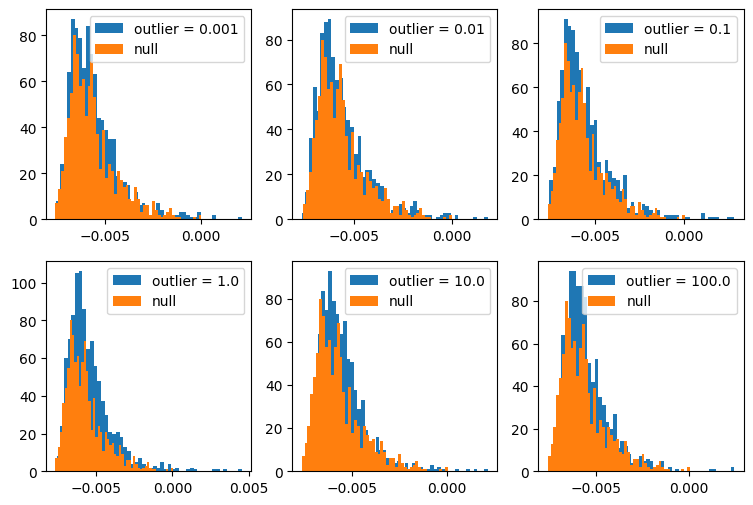

In [192]:
# true sampling distribution
figs, axes = plt.subplots(nrows=2, ncols=3, figsize=(9, 6))

for i, ww in enumerate(outliers_ls):
    ax = axes.flatten()[i]
    ax.hist(res_ol["tilted"][i], bins=50, label=f"outlier = {ww}")
    ax.hist(res_ol["tilted_null"][0], bins=50, label=f"null")
    # ax.set_xlim(0., 0.11)
    ax.legend()

# plt.savefig("../figs/ustats_ol_tilted.pdf")

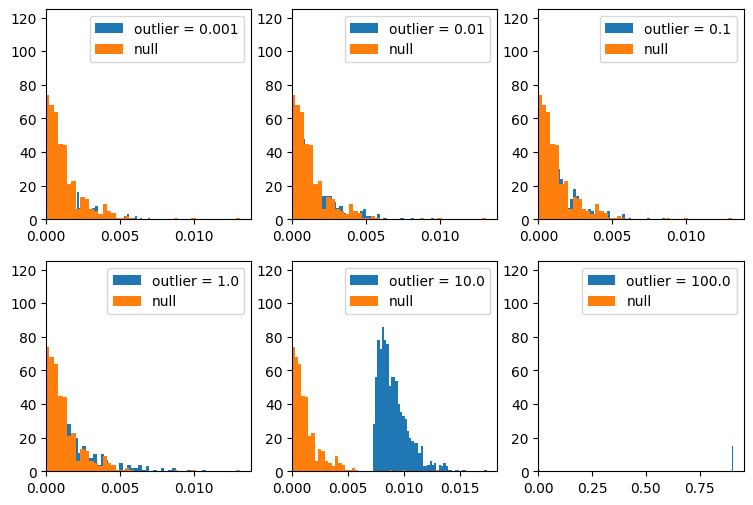

In [193]:
# true sampling distribution
figs, axes = plt.subplots(nrows=2, ncols=3, figsize=(9, 6))

for i, ww in enumerate(outliers_ls):
    ax = axes.flatten()[i]
    ax.hist(res_ol["rbf"][i], bins=50, label=f"outlier = {ww}")
    ax.hist(res_ol["rbf_null"][0], bins=50, label=f"null")
    ax.set_xlim(0.)
    ax.legend()

# plt.savefig("../figs/ustats_ol_rbf.pdf")

#### Check power

In [164]:
def stats_mean_shift(mean_ls, kernel_name, nreps, dim=1, n=1000):
    stats_ls_all_ol = []
    
    for mean in mean_ls:
        stat_ls = []
        
        ###
        mean1 = np.eye(dim)[0] * mean # data
        mean2 = np.zeros((dim,)) # model
        
        Xs = np.random.multivariate_normal(mean1, np.eye(dim), (nreps, n))    
        score_fn = lambda x: - (x - mean2)
        ###

        if kernel_name == "tilted":
            score_weight_fn = kernels.PolyWeightFunction()
            kernel0 = kernels.RBF(sigma_sq=2.)
            kernel = kernels.TiltedKernel(kernel=kernel0, weight_fn=score_weight_fn)
        elif kernel_name == "rbf":
            kernel = kernels.RBF(sigma_sq=2.)
        
        ksd = metrics.KSD(kernel, score_fn=score_fn)
        for X in tqdm(Xs):
            stat_ls.append(ksd(X, X))
    
        stats_ls_all_ol.append(stat_ls)

    return stats_ls_all_ol

In [183]:
np.random.seed(2024)

In [184]:
mean_ls = [1e-2, 1e-1, 1., 10., 100., 1000.]

In [ ]:
stats_ls_all_ms_tilted = stats_mean_shift(mean_ls, "tilted", nreps=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
plt.plot(mean_ls, [np.mean(rr) for rr in stats_ls_all_ms_tilted])
plt.xscale("log")

In [ ]:
res_ms = {"tilted": stats_ls_all_ms_tilted,  
          "tilted_null": stats_ls_all_ol_tilted_null}

In [ ]:
# pickle.dump(res_ms, open("../res/ustats_ms.pkl", "wb"))

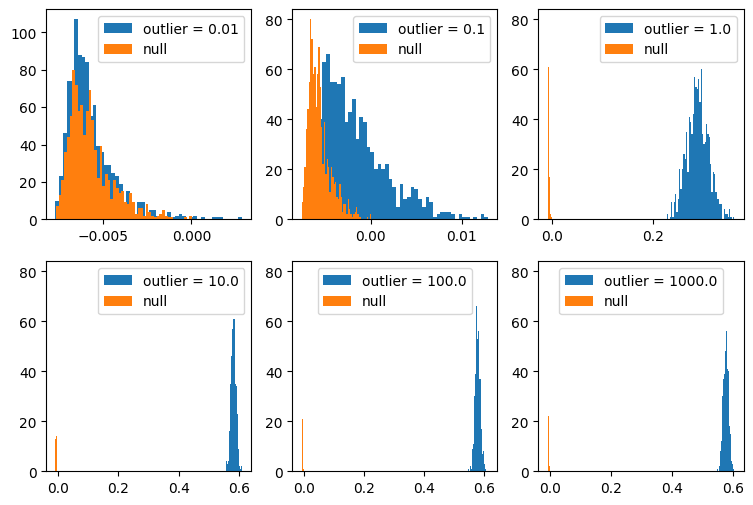

In [194]:
# true sampling distribution
figs, axes = plt.subplots(nrows=2, ncols=3, figsize=(9, 6))

for i, ww in enumerate(mean_ls):
    ax = axes.flatten()[i]
    ax.hist(res_ms["tilted"][i], bins=50, label=f"outlier = {ww}")
    ax.hist(res_ms["tilted_null"][0], bins=50, label=f"null")
    ax.legend()

# plt.savefig("../figs/ustats_ms_tilted.pdf")

#### Check that the simple test with tilted kernel is asymptotically valid
Need $\epsilon_{m, n} \to 0$, $m \to \infty$

In [2]:
def simple_test_outliers(outliers_ls, kernel_name, nreps, eps=0.01, dim=1, n=1000):
    res = {"stats": [], "pval": [], "boot_stat": []}
    
    for outlier in outliers_ls:
        stat_ls = []
        pval_ls = []
        boot_stats_ls = []
        
        ###
        mean1 = np.zeros((dim,)) # data
        mean2 = np.zeros((dim,)) # model
        
        Xs = np.random.multivariate_normal(mean1, np.eye(dim), (nreps, n))
        n_outlier = max(1, int(n * eps))
        Xs[:, :n_outlier] = outlier
    
        score_fn = lambda x: - (x - mean2)
        ###

        if kernel_name == "tilted":
            score_weight_fn = kernels.PolyWeightFunction()
            kernel0 = kernels.RBF(sigma_sq=2.)
            kernel = kernels.TiltedKernel(kernel=kernel0, weight_fn=score_weight_fn)
        elif kernel_name == "rbf":
            kernel = kernels.RBF(sigma_sq=2.)
        
        ksd = metrics.KSD(kernel, score_fn=score_fn)
        wild_boot = boot.WildBootstrap(ksd)
        for X in tqdm(Xs):
            # pval, stat = wild_boot.pval(X, X, return_test_stat=True)
            pval, stat, boot_stats = wild_boot.pval(X, X, return_boot=True, return_stat=True)
            stat_ls.append(stat)
            pval_ls.append(pval)
            boot_stats_ls.append(boot_stats)
    
        res["stats"].append(stat_ls)
        res["pval"].append(pval_ls)
        res["boot_stat"].append(boot_stats_ls)

    return res

In [6]:
np.random.seed(2024)

In [32]:
outliers_ls = [0.001, 0.01, 0.1, 1., 10., 100.]

In [8]:
res_null_tilted = simple_test_outliers([0.], "tilted", eps=0., nreps=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


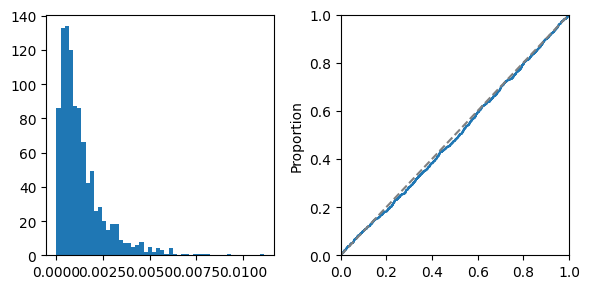

In [30]:
figs, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))

ax = axes[0]
_ = ax.hist(res_null_tilted["stats"], bins=50)

ax = axes[1]
# _ = ax.hist(res_null_tilted["pval"], bins=50)
sns.ecdfplot(ax=ax, x=np.array(res_null_tilted["pval"][0]))
ax.plot([0., 1.], [0., 1.], linestyle="--", color="grey")
ax.set_xlim(0., 1.)
ax.set_ylim(0., 1.)

plt.tight_layout()

In [ ]:
res_ol_tilted = simple_test_outliers(outliers_ls, "tilted", nreps=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(3, 3))

for i, kk in enumerate(outliers_ls):
    sns.ecdfplot(ax=ax, x=np.array(res_ol_tilted["pval"][i]), label=f"outlier: {kk}")

ax.plot([0., 1.], [0., 1.], linestyle="--", color="grey")
ax.set_xlim(0., 1.)
ax.set_ylim(0., 1.)

plt.tight_layout()

# Deviation threshold

In [2]:
def make_contam_score(mu, eps):
    """
    score function of (1-eps)*p(x) + eps*r(x), where p, r are Gaussians.
    """
    mu_norm_sq = np.sum(mu**2)
    mu_pd = np.reshape(mu, (1, -1))
    def contam_score(x):
        exp = np.exp(- 0.5 * mu_norm_sq + np.sum(mu_pd * x))
        num = - (1 - eps) * x - eps * (x - mu_pd) * exp
        denom = 1 - eps + eps * exp
        return num / denom
    return contam_score

def stats_mean_shift_threshold(mean_ls, kernel_name, nreps, dim=1, n=1000, eps0=0.01, model="mean_shift"):
    stats_ls_all_ol = []
    threshold_res = {"threshold": [], "tau": [], "threshold_robust": [],}
    
    for mean in mean_ls:
        stat_ls = []
        
        ### 1. mean shift
        mean1 = np.eye(dim)[0] * mean # data
        mean2 = np.zeros((dim,)) # model
        
        Xs = np.random.multivariate_normal(mean1, np.eye(dim), (nreps, n))    
        score_fn = lambda x: - (x - mean2)
        ###

        if kernel_name == "tilted":
            score_weight_fn = kernels.PolyWeightFunction()
            kernel0 = kernels.RBF(sigma_sq=2.)
            kernel = kernels.TiltedKernel(kernel=kernel0, weight_fn=score_weight_fn)
        elif kernel_name == "rbf":
            kernel = kernels.RBF(sigma_sq=2.)
        
        ksd = metrics.KSD(kernel, score_fn=score_fn)
        for X in tqdm(Xs):
            stat_ls.append(ksd(X, X, vstat=True))
    
        stats_ls_all_ol.append(stat_ls)

        # compute deviation threshold
        test_thres = ksd.test_threshold(n)
        tau = ksd.tau
        threshold_res["threshold"].append(test_thres)
        threshold_res["tau"].append(tau)
        threshold_res["threshold_robust"].append(ksd.test_threshold(n, m0=int(n*(1-eps0)), method="eps_robust"))

    return stats_ls_all_ol, threshold_res

In [7]:
np.random.seed(2024)

In [8]:
# mean_ls = [0., 1e-1, 1., 10., 100.]
mean_ls = [0., 1e-1, 1., 1.2, 1.4, 1.6, 1.8, 10.]
eps0_ls = [0.01, 0.05, 0.1]

stats_ls_all_ms_tilted_all = []
thresh_res_ms_all = []

for eps0 in eps0_ls:
    print("eps0:", eps0)
    stats_ls_all_ms_tilted, thresh_res_ms = stats_mean_shift_threshold(mean_ls, "tilted", eps0=eps0, nreps=100)
    stats_ls_all_ms_tilted_all.append(stats_ls_all_ms_tilted)
    thresh_res_ms_all.append(thresh_res_ms)

eps0: 0.01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

eps0: 0.05


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

eps0: 0.1


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
# np.random.seed(1)
# _ = stats_mean_shift_threshold([0., 1e-1], "tilted", nreps=2)
# # _[0]

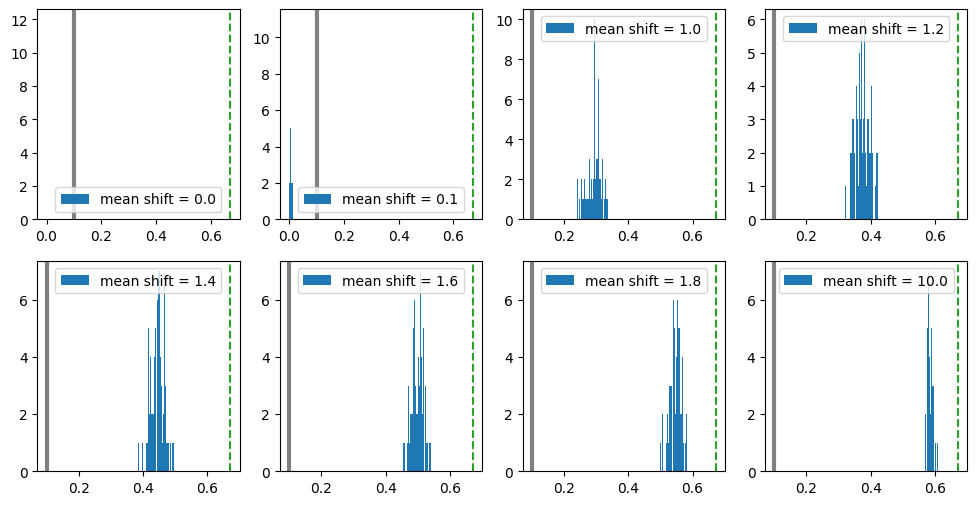

In [9]:
# true sampling distribution
figs, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))

for i, ww in enumerate(mean_ls):
    ax = axes.flatten()[i]
    ax.hist(stats_ls_all_ms_tilted[i], bins=50, label=f"mean shift = {ww}")
    # ax.hist(stats_ls_all_ms_tilted["tilted_null"][0], bins=50, label=f"null")
    ax.axvline(thresh_res_ms["threshold"][i], color="gray", linestyle="-", linewidth=3)
    ax.axvline(thresh_res_ms["threshold_robust"][i], color="C2", linestyle="--")
    ax.legend()

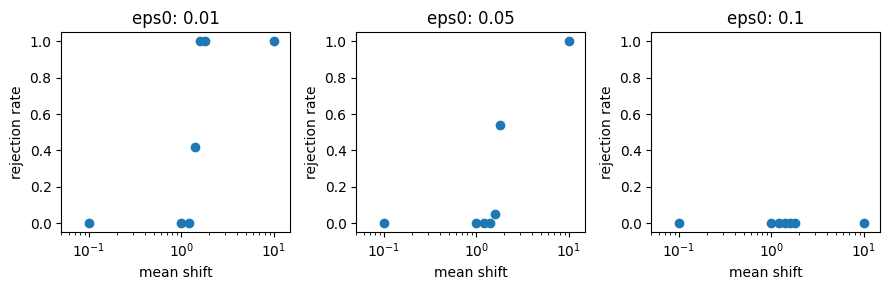

In [56]:
figs, axes = plt.subplots(nrows=1, ncols=len(eps0_ls), figsize=(3*len(eps0_ls), 3))

for i, ax in enumerate(axes.flatten()):
    stats_ls_all_ms_tilted = stats_ls_all_ms_tilted_all[i]
    thresh_res_ms = thresh_res_ms_all[i]
    
    robust_rej = [np.mean(np.array(ss) > tt) for ss, tt in zip(stats_ls_all_ms_tilted, thresh_res_ms["threshold_robust"])]
    ax.scatter(mean_ls, robust_rej)
    ax.set_xscale("log")
    ax.set_ylabel("rejection rate")
    ax.set_xlabel("mean shift")
    ax.set_title(f"eps0: {eps0_ls[i]}")
    ax.set_ylim(-0.05, 1.05)
    ax.set_xlim(mean_ls[0] + 0.05, mean_ls[-1] + 5.)

plt.tight_layout()

In [11]:
def ksd_experiment_single(kernel_class, weight_fn_class, Xs, score_fn, theta, nboot=500, alpha=0.05):
    res = {
        "deviation": {"val": [], "threshold": [], "rej": [], "tau": []},
    }

    for X in tqdm(Xs, total=Xs.shape[0]):
        weight_fn = weight_fn_class()
        kernel0 = kernel_class(sigma_sq=2.)
        kernel = kernels.TiltedKernel(kernel=kernel0, weight_fn=weight_fn)
    
        ksd = metrics.KSD(kernel, score_fn=score_fn)
        val = ksd(X, X, vstat=True)
        threshold = ksd.test_threshold(X.shape[0])
        
        # 1. deviation bound
        # rej = mmd.reverse_test(X, Y, theta, alpha)
        rej = np.float32(val > threshold)
        
        # save results
        res["deviation"]["val"].append(val)
        res["deviation"]["threshold"].append(threshold)
        res["deviation"]["rej"].append(rej)
        res["deviation"]["tau"].append(ksd.tau)
        
    return res

def ksd_experiment(kernel_class, weight_fn_class, Xs, score_fns, theta, keys, nboot=500):
    """
    Xs: [array(nrep, n, d), ...]
    Ys: [array(nrep, n, d), ...]
    """
    res = {}
    for Xs_i, score_fn_i, kk in zip(Xs, score_fns, keys):
        print("key:", kk)
        res[kk] = ksd_experiment_single(kernel_class, weight_fn_class, Xs_i, score_fn_i, theta, nboot=nboot)

    return res
    

In [17]:
np.random.seed(2024)

In [18]:
nrep = 100
n = 1000
dim = 1
mean1 = np.zeros((dim,)) # data
mean2 = np.zeros((dim,)) # model

# mean_ls = [1., 1.2, 1.4, 1.6, 1.8, 2.]
mean_ls = [.1, .2, .4, .5, .6, .8]

### Gaussian loc
Xs = [
    np.random.multivariate_normal(np.eye(dim)[0] * m, np.eye(dim), (nrep, n)) for m in mean_ls
]

score_fns = [lambda x: - (x - mean2) for _ in range(nrep)]

### Gaussian with outliers
# score_fns = [lambda x: - (x - mean2) for _ in range(nrep)]

# eps = 0.01
# outlier = 10.
# Xs = np.random.multivariate_normal(mean1, np.eye(dim), (nrep, n))
# n_outlier = max(1, int(n * eps))
# Xs[:, :n_outlier] = outlier
###

weight_fn_class = kernels.PolyWeightFunction
kernel_class = kernels.RBF

In [19]:
res_ms = ksd_experiment(kernel_class, weight_fn_class, Xs, score_fns, theta=0., keys=mean_ls)

key: 0.1


  0%|          | 0/100 [00:00<?, ?it/s]

key: 0.2


  0%|          | 0/100 [00:00<?, ?it/s]

key: 0.4


  0%|          | 0/100 [00:00<?, ?it/s]

key: 0.5


  0%|          | 0/100 [00:00<?, ?it/s]

key: 0.6


  0%|          | 0/100 [00:00<?, ?it/s]

key: 0.8


  0%|          | 0/100 [00:00<?, ?it/s]

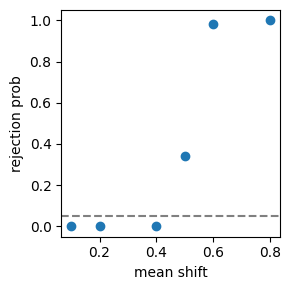

In [22]:
# expect to see power for larger mean shifts
fig, ax = plt.subplots(figsize=(3, 3))

rej_rate = [np.mean(res_ms[kk]["deviation"]["rej"]) for kk in mean_ls]
ax.scatter(mean_ls, rej_rate)
ax.axhline(0.05, color="gray", linestyle="--")
ax.set_xlabel("mean shift")
ax.set_ylabel("rejection prob")
# ax.set_xscale("log")

plt.tight_layout()

#### Check kernel upper bounds

In [46]:
weight_fn = kernels.PolyWeightFunction()
kernel0 = kernels.RBF(sigma_sq=2.)
kernel = kernels.TiltedKernel(kernel=kernel0, weight_fn=weight_fn)

In [47]:
xx = np.reshape(np.linspace(-3., 3., 1001), (-1, 1))
gradgrad_k = kernel.gradgrad(xx, xx)


In [48]:
np.max(gradgrad_k)

Array(1., dtype=float32)

In [52]:
kernel.kernel.grad_second_sup

Array(1., dtype=float32, weak_type=True)

# Simple KSD as $\epsilon$ vary

In [2]:
def rej_rate_outliers(outlier, n_ls, eps_ls, kernel_name, nreps, dim=1, alpha=0.05):
    res = {oo: {ee: {
        "tilted": {"stat": [], "pval": [], "rej": [], "boot_stats": []},
        "rbf": {"stat": [], "pval": [], "rej": [], "boot_stats": []}
    } for ee in eps_ls} for oo in n_ls}
    res["eps_ls"] = eps_ls
    
    for n in n_ls:
        for eps in eps_ls:
            print("eps:", eps)
            ###
            mean1 = np.zeros((dim,)) # data
            mean2 = np.zeros((dim,)) # model
            
            Xs = np.random.multivariate_normal(mean1, np.eye(dim), (nreps, n))
            n_outlier = max(1, int(n * eps))
            Xs[:, :n_outlier] = outlier
        
            score_fn = lambda x: - (x - mean2)
            ###
    
            # tilted
            score_weight_fn = kernels.PolyWeightFunction()
            kernel0 = kernels.RBF(sigma_sq=2.)
            kernel = kernels.TiltedKernel(kernel=kernel0, weight_fn=score_weight_fn)

            ksd = metrics.KSD(kernel, score_fn=score_fn)
            wild_boot = boot.WildBootstrap(ksd)
            for X in tqdm(Xs):                
                pval, stat, boot_stats = wild_boot.pval(X, X, return_stat=True, return_boot=True)
                res[n][eps]["tilted"]["stat"].append(stat)
                res[n][eps]["tilted"]["pval"].append(pval)
                res[n][eps]["tilted"]["rej"].append(int(pval > alpha))
                res[n][eps]["tilted"]["boot_stats"].append(boot_stats)
        
            # RBF
            kernel = kernels.RBF(sigma_sq=2.)
            
            ksd = metrics.KSD(kernel, score_fn=score_fn)
            wild_boot = boot.WildBootstrap(ksd)
            for X in tqdm(Xs):                
                pval, stat, boot_stats = wild_boot.pval(X, X, return_stat=True, return_boot=True)
                res[n][eps]["rbf"]["stat"].append(stat)
                res[n][eps]["rbf"]["pval"].append(pval)
                res[n][eps]["rbf"]["rej"].append(int(pval > alpha))
                res[n][eps]["rbf"]["boot_stats"].append(boot_stats)
        
    return res

In [3]:
np.random.seed(2024)

# outliers_ls = [1., 10.] # [0.1, 1., 10., 100.]
outlier = 10.
n = 500
n_ls = [n] # [100, 500, 1000]
eps_ls = [0.1, 0.05, 0.01, 0.005] # [0.01, 0.1]

In [4]:
# res_ol = rej_rate_outliers(outlier, n_ls, eps_ls, kernel_name="tilted", nreps=100)

In [5]:
outlier_ls = [0.1, 1., 10., 100.]
res_ol = {}
for outlier in outlier_ls:
    sub_res_ol = rej_rate_outliers(outlier, n_ls, eps_ls, kernel_name="tilted", nreps=100)
    res_ol[outlier] = sub_res_ol

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


eps: 0.1


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

eps: 0.05


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

eps: 0.01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

eps: 0.005


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

eps: 0.1


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

eps: 0.05


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

eps: 0.01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

eps: 0.005


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

eps: 0.1


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

eps: 0.05


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

eps: 0.01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

eps: 0.005


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

eps: 0.1


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

eps: 0.05


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

eps: 0.01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

eps: 0.005


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

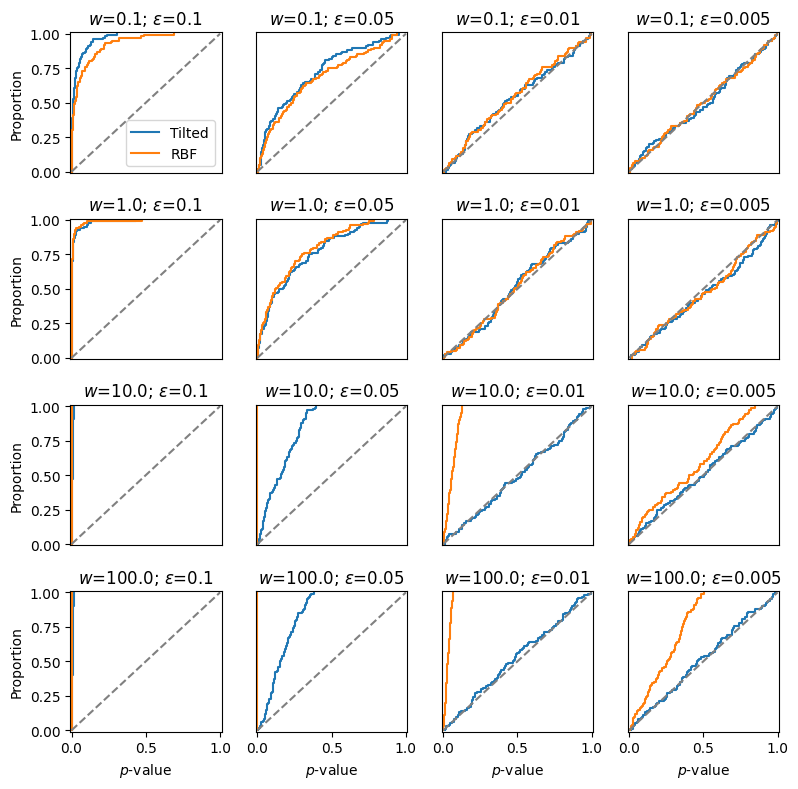

In [18]:
figs, axes = plt.subplots(ncols=len(eps_ls), nrows=len(outlier_ls), figsize=(2*len(eps_ls), 2*len(outlier_ls)))

for i in range(len(outlier_ls)):
    for j in range(len(eps_ls)):
        ax = axes[i][j]
        sns.ecdfplot(ax=ax, x=np.array(res_ol[outlier_ls[i]][n][eps_ls[j]]["tilted"]["pval"]), label="Tilted")
        sns.ecdfplot(ax=ax, x=np.array(res_ol[outlier_ls[i]][n][eps_ls[j]]["rbf"]["pval"]), label="RBF")
        ax.plot([0., 1.], [0., 1.], linestyle="--", color="grey")
        ax.set_xlim(-0.01, 1.01)
        ax.set_ylim(-0.01, 1.01)
        ax.set_title(rf"$w$={outlier_ls[i]}; $\epsilon$={eps_ls[j]}")
        ax.set_ylabel("")
        ax.set_xlabel("")
        
        if i < len(outlier_ls) - 1:
            ax.get_xaxis().set_ticks([])
        if j > 0:
            ax.get_yaxis().set_ticks([])
        if j == 0:
            ax.set_ylabel("Proportion")
        if i == len(outlier_ls) - 1:
            ax.set_xlabel(r"$p$-value")
        # if j == len(eps_ls) - 1:
        #     ax.twinx().set_ylabel(f"eps={eps_ls[j]}")
        #     ax.twinx().get_yaxis().set_ticks([])

axes.flatten()[0].legend(loc="lower right")
plt.tight_layout()
plt.savefig("../figs/robust/simple_ksd.pdf")